In [1]:
import pandas as pd
import numpy as np 

from scipy.interpolate import griddata

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()


In [2]:
df_elevation = pd.read_csv('elevation_data.csv', sep='\t', encoding='utf-8')
df_VLM = pd.read_csv('VLM_data.csv', sep='\t', encoding='utf-8')
df_SLR = pd.read_csv('SLR_data.csv', sep='\t', encoding='utf-8')

In [3]:
df_elevation

,Unnamed: 0,Elevation,Longitude,Latitude
0,0,1.0,54.651806,24.700139
1,1,0.0,54.652084,24.700139
2,2,1.0,54.652361,24.700139
3,3,1.0,54.652639,24.700139
4,4,2.0,54.652917,24.700139
...,...,...,...,...
1789656,1789656,37.0,54.698750,24.212083
1789657,1789657,36.0,54.699028,24.212083
1789658,1789658,37.0,54.699306,24.212083
1789659,1789659,38.0,54.699584,24.212083


In [4]:
df_VLM

,Unnamed: 0,Station,Longitude,Latitude,VLM,VLM_std
0,0,NYWV,54.684594,24.796595,-0.207,0.223
1,1,NYWT,54.115618,24.303783,1.413,0.158
2,2,NYSM,53.848164,24.056855,-0.856,0.154
3,3,NYRH,53.141386,24.147625,-0.724,0.166
4,4,NYRB,52.587928,24.171598,1.812,0.274
5,5,NYQN,52.763306,24.027073,-0.724,0.135
6,6,NYPD,53.470797,23.925228,2.240,0.164
7,7,NYPB,54.162907,24.134528,2.164,0.162
8,8,NYON,54.429235,24.539444,-0.683,0.170
9,9,NYNB,54.319712,24.460688,-0.259,0.255


In [5]:
df_SLR

,Unnamed: 0,Site,PSMSL ID,Latitude,Longitude,Scenario,Background RSL rate (mm/yr),RSL in 2000 (cm),RSL in 2010 (cm),RSL in 2020 (cm),...,RSL in 2040 (cm),RSL in 2050 (cm),RSL in 2060 (cm),RSL in 2070 (cm),RSL in 2080 (cm),RSL in 2090 (cm),RSL in 2100 (cm),RSL in 2120 (cm),RSL in 2150 (cm),RSL in 2200 (cm)
0,0,NEW YORK,12,54.080777,23.8926,0.3 - MED,1.29,0,5,11,...,20,25,31,36,39,44,46,51,58,69
1,1,NEW YORK,12,54.080777,23.8926,0.3 - LOW,1.20,0,2,6,...,13,15,18,19,21,21,22,27,28,26
2,2,NEW YORK,12,54.080777,23.8926,0.3 - HIGH,1.38,0,7,14,...,28,36,42,49,54,60,65,75,88,110
3,3,NEW YORK,12,54.080777,23.8926,0.5 - MED,1.29,0,6,13,...,25,31,39,45,50,56,61,70,85,110
4,4,NEW YORK,12,54.080777,23.8926,0.5 - LOW,1.20,0,4,8,...,18,24,29,33,39,43,47,54,63,70
5,5,NEW YORK,12,54.080777,23.8926,0.5 - HIGH,1.38,0,7,16,...,31,39,47,54,60,66,72,85,106,145
6,6,NEW YORK,12,54.080777,23.8926,1.0 - MED,1.29,0,9,19,...,39,51,65,80,96,114,130,148,202,295
7,7,NEW YORK,12,54.080777,23.8926,1.0 - LOW,1.20,0,6,12,...,29,40,52,64,78,92,106,122,167,240
8,8,NEW YORK,12,54.080777,23.8926,1.0 - HIGH,1.38,0,11,23,...,47,60,76,93,111,130,150,176,238,359
9,9,NEW YORK,12,54.080777,23.8926,1.5 - MED,1.29,0,12,25,...,53,71,92,114,139,167,197,247,353,567


Text(0.5, 1.0, '2d map of region of intrest')

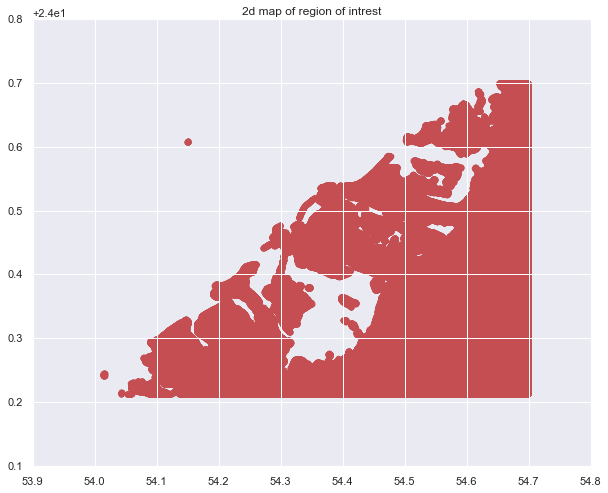

In [6]:
plt.figure(figsize = (10,8))
plt.scatter(df_elevation.Longitude, df_elevation.Latitude, zorder=0, color='r')
plt.title("2d map of region of intrest")

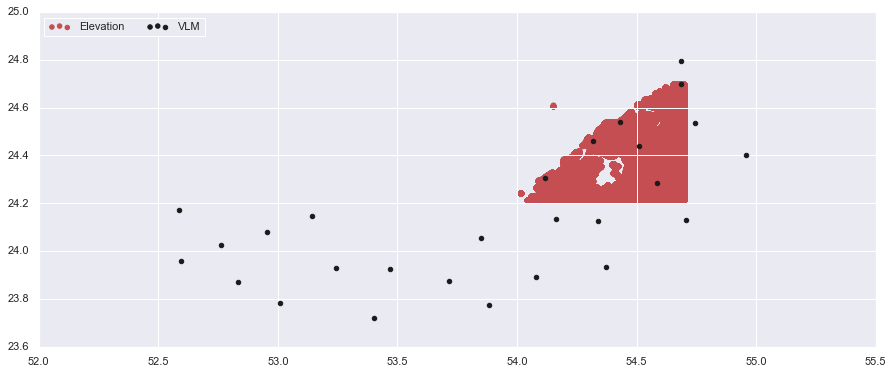

In [7]:
plt.figure(figsize = (15,6))
plt.scatter(df_elevation.Longitude, df_elevation.Latitude, zorder=0, color='r')
plt.scatter(df_VLM.Longitude, df_VLM.Latitude, color='k' )

plt.legend(('Elevation','VLM'), ncol=2, loc='upper left');

In [8]:
min1, max1 = min(df_VLM.Longitude), max(df_VLM.Longitude)
min2, max2 = min(df_VLM.Latitude), max(df_VLM.Latitude)

In [9]:
# grid_x, grid_y = np.meshgrid(np.linspace(min1,max1,100),np.linspace(min2,max2,100))
grid_x, grid_y = np.mgrid[min1:max1:1000j, min2:max2:1000j]

In [10]:
grid_x

array([[52.587928  , 52.587928  , 52.587928  , ..., 52.587928  ,
        52.587928  , 52.587928  ],
       [52.59030199, 52.59030199, 52.59030199, ..., 52.59030199,
        52.59030199, 52.59030199],
       [52.59267597, 52.59267597, 52.59267597, ..., 52.59267597,
        52.59267597, 52.59267597],
       ...,
       [54.95479203, 54.95479203, 54.95479203, ..., 54.95479203,
        54.95479203, 54.95479203],
       [54.95716601, 54.95716601, 54.95716601, ..., 54.95716601,
        54.95716601, 54.95716601],
       [54.95954   , 54.95954   , 54.95954   , ..., 54.95954   ,
        54.95954   , 54.95954   ]])

In [11]:
grid_y

array([[23.721481  , 23.72255719, 23.72363338, ..., 24.79444262,
        24.79551881, 24.796595  ],
       [23.721481  , 23.72255719, 23.72363338, ..., 24.79444262,
        24.79551881, 24.796595  ],
       [23.721481  , 23.72255719, 23.72363338, ..., 24.79444262,
        24.79551881, 24.796595  ],
       ...,
       [23.721481  , 23.72255719, 23.72363338, ..., 24.79444262,
        24.79551881, 24.796595  ],
       [23.721481  , 23.72255719, 23.72363338, ..., 24.79444262,
        24.79551881, 24.796595  ],
       [23.721481  , 23.72255719, 23.72363338, ..., 24.79444262,
        24.79551881, 24.796595  ]])

In [12]:
# fig, ax = plt.subplots()
# ax.scatter(grid_x,grid_y)

In [13]:
points =df_VLM[['Longitude','Latitude']].values
values = df_VLM.VLM.values

In [14]:
grid_z0 = griddata(points,values, (grid_x, grid_y), method='nearest')

In [15]:
np.min(grid_z0)

-1.207

In [16]:
np.max(grid_z0)

2.471

In [17]:
np.shape(grid_z0)

(1000, 1000)

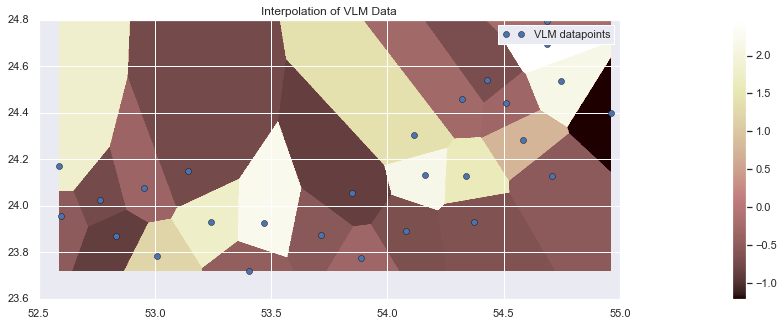

In [18]:
import matplotlib.pyplot as plt
from matplotlib import cm
# plt.scatter(df_VLM.Longitude, df_VLM.Latitude, color='k' )

plt.figure(figsize = (40,5))
plt.imshow(grid_z0.T, extent=(min1, max1, min2, max2), origin='lower', cmap=cm.pink) 
 
plt.title('Interpolation of VLM Data')
# plt.pcolormesh(grid_x, grid_y, grid_z0, shading='auto')
plt.plot(df_VLM.Longitude, df_VLM.Latitude,"ok",  label="VLM datapoints", color='b' )

plt.legend()
plt.colorbar()
plt.show()

In [19]:
grid_z0

array([[-0.491, -0.491, -0.491, ...,  1.812,  1.812,  1.812],
       [-0.491, -0.491, -0.491, ...,  1.812,  1.812,  1.812],
       [-0.491, -0.491, -0.491, ...,  1.812,  1.812,  1.812],
       ...,
       [-0.51 , -0.51 , -0.51 , ..., -0.207, -0.207, -0.207],
       [-0.51 , -0.51 , -0.51 , ..., -0.207, -0.207, -0.207],
       [-0.51 , -0.51 , -0.51 , ..., -0.207, -0.207, -0.207]])

In [20]:
grid_z0 = griddata(points,values, df_elevation[['Longitude','Latitude']].values, method='nearest')


In [21]:
# import matplotlib.pyplot as plt
# from matplotlib import cm
# # plt.scatter(df_VLM.Longitude, df_VLM.Latitude, color='k' )

# plt.figure(figsize = (20,8))
# # plt.plot(grid_z0.T, extent=(min1, max1, min2, max2), origin='lower', cmap=cm.pink) 
 
# plt.title('Interpolation of VLM Data')
# # plt.pcolormesh(grid_x, grid_y, grid_z0, shading='auto')
# plt.plot(df_VLM.Longitude, df_VLM.Latitude, "ok", label="input point", color='b' )

# # plt.legend()
# # plt.colorbar()
# plt.show()

In [22]:
 df_elevation['VLM'] = grid_z0

In [23]:
np.shape(df_elevation[['Longitude','Latitude']].values)

(1789661, 2)

In [24]:
# plt.plot(df_elevation.Longitude, df_elevation.Latitude, zorder=0)
# plt.scatter(df_VLM.Longitude, df_VLM.Latitude, color='k' )

# plt.legend(('Elevation','VLM'), ncol=2, loc='upper left');

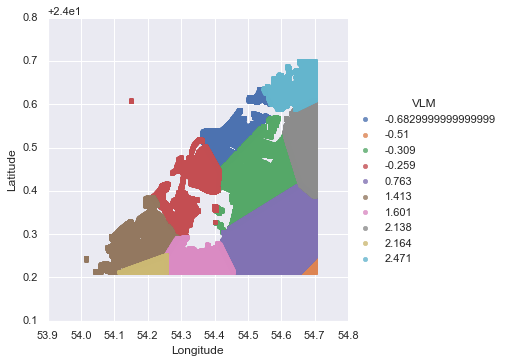

In [25]:
sns.lmplot(x='Longitude', y='Latitude', data = df_elevation, hue='VLM' , fit_reg=False)
# plt.scatter(df_elevation['Longitude'], df_elevation['Latitude'], c=df_elevation['VLM'], cmap='viridis')
# plt.show()

In [26]:
# grid_z0 = griddata(points,values, df_elevation[['Longitude','Latitude']].values, method='cubic')
# df_elevation['VLM'] = grid_z0
# sns.lmplot(x='Longitude', y='Latitude', data = df_elevation, hue='VLM' , fit_reg=False)


In [27]:
df_elevation

,Unnamed: 0,Elevation,Longitude,Latitude,VLM
0,0,1.0,54.651806,24.700139,2.471
1,1,0.0,54.652084,24.700139,2.471
2,2,1.0,54.652361,24.700139,2.471
3,3,1.0,54.652639,24.700139,2.471
4,4,2.0,54.652917,24.700139,2.471
...,...,...,...,...,...
1789656,1789656,37.0,54.698750,24.212083,-0.510
1789657,1789657,36.0,54.699028,24.212083,-0.510
1789658,1789658,37.0,54.699306,24.212083,-0.510
1789659,1789659,38.0,54.699584,24.212083,-0.510


In [28]:
df_SLR = df_SLR.set_index('Scenario')

#### Mapping the Sea Level change to the elevation and VLM
AE=E−SL+VLM 

In [29]:
from datetime import datetime
df_SLR.columns

Index(['Unnamed: 0', 'Site', 'PSMSL ID', 'Latitude', 'Longitude',
       'Background RSL rate (mm/yr)', 'RSL in 2000 (cm)', 'RSL in 2010 (cm)',
       'RSL in 2020 (cm)', 'RSL in 2030 (cm)', 'RSL in 2040 (cm)',
       'RSL in 2050 (cm)', 'RSL in 2060 (cm)', 'RSL in 2070 (cm)',
       'RSL in 2080 (cm)', 'RSL in 2090 (cm)', 'RSL in 2100 (cm)',
       'RSL in 2120 (cm)', 'RSL in 2150 (cm)', 'RSL in 2200 (cm)'],
      dtype='object')

In [30]:
today = datetime.today()
current_year =  today.year 
current_year

2021

In [31]:
df_final = df_elevation.copy(deep=True)

In [32]:
df_SLR

,Unnamed: 0,Site,PSMSL ID,Latitude,Longitude,Background RSL rate (mm/yr),RSL in 2000 (cm),RSL in 2010 (cm),RSL in 2020 (cm),RSL in 2030 (cm),RSL in 2040 (cm),RSL in 2050 (cm),RSL in 2060 (cm),RSL in 2070 (cm),RSL in 2080 (cm),RSL in 2090 (cm),RSL in 2100 (cm),RSL in 2120 (cm),RSL in 2150 (cm),RSL in 2200 (cm)
Scenario,,,,,,,,,,,,,,,,,,,,
0.3 - MED,0,NEW YORK,12,54.080777,23.8926,1.29,0,5,11,15,20,25,31,36,39,44,46,51,58,69
0.3 - LOW,1,NEW YORK,12,54.080777,23.8926,1.20,0,2,6,10,13,15,18,19,21,21,22,27,28,26
0.3 - HIGH,2,NEW YORK,12,54.080777,23.8926,1.38,0,7,14,21,28,36,42,49,54,60,65,75,88,110
0.5 - MED,3,NEW YORK,12,54.080777,23.8926,1.29,0,6,13,19,25,31,39,45,50,56,61,70,85,110
0.5 - LOW,4,NEW YORK,12,54.080777,23.8926,1.20,0,4,8,13,18,24,29,33,39,43,47,54,63,70
0.5 - HIGH,5,NEW YORK,12,54.080777,23.8926,1.38,0,7,16,23,31,39,47,54,60,66,72,85,106,145
1.0 - MED,6,NEW YORK,12,54.080777,23.8926,1.29,0,9,19,29,39,51,65,80,96,114,130,148,202,295
1.0 - LOW,7,NEW YORK,12,54.080777,23.8926,1.20,0,6,12,21,29,40,52,64,78,92,106,122,167,240
1.0 - HIGH,8,NEW YORK,12,54.080777,23.8926,1.38,0,11,23,34,47,60,76,93,111,130,150,176,238,359


In [33]:
dates = [2030, 2050, 2080, 2100]
scenario = ['0.3 - LOW']

In [44]:
for i in dates:
    df_final['AdjustedElevation_'+ str(i)] = df_final['Elevation'] + df_final['VLM'] - df_SLR['RSL in '+ str(i) +' (cm)'].loc[scenario[0]]

In [45]:
df_final 

,Unnamed: 0,Elevation,Longitude,Latitude,VLM,AdjustedElevation_2030,AdjustedElevation_2050,AdjustedElevation_2080,AdjustedElevation_2100
0,0,1.0,54.651806,24.700139,2.471,-6.529,-11.529,-17.529,-18.529
1,1,0.0,54.652084,24.700139,2.471,-7.529,-12.529,-18.529,-19.529
2,2,1.0,54.652361,24.700139,2.471,-6.529,-11.529,-17.529,-18.529
3,3,1.0,54.652639,24.700139,2.471,-6.529,-11.529,-17.529,-18.529
4,4,2.0,54.652917,24.700139,2.471,-5.529,-10.529,-16.529,-17.529
...,...,...,...,...,...,...,...,...,...
1789656,1789656,37.0,54.698750,24.212083,-0.510,26.490,21.490,15.490,14.490
1789657,1789657,36.0,54.699028,24.212083,-0.510,25.490,20.490,14.490,13.490
1789658,1789658,37.0,54.699306,24.212083,-0.510,26.490,21.490,15.490,14.490
1789659,1789659,38.0,54.699584,24.212083,-0.510,27.490,22.490,16.490,15.490


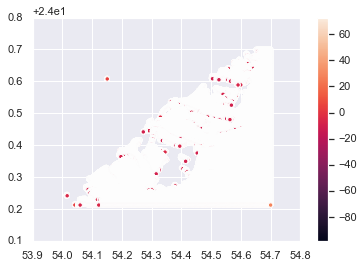

In [51]:
import matplotlib.pyplot as plt
cm = plt.cm.get_cmap('RdYlBu')

x = df_final['Longitude'].values
y = df_final['Latitude'].values
z = df_final['AdjustedElevation_2030'].values
# sc = plt.scatter(x, y, c=z, vmin=min(z), vmax=max(z), cmap=cm)
sc = plt.scatter(x, y, c=z, vmin=min(z), vmax=max(z))
plt.colorbar(sc)
plt.show()

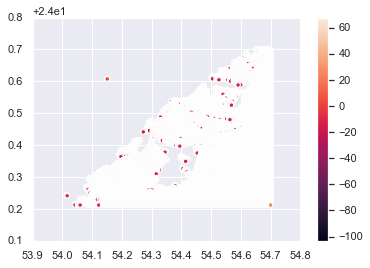

In [48]:
cm = plt.cm.get_cmap('RdYlBu')

x = df_final['Longitude'].values
y = df_final['Latitude'].values
z = df_final['AdjustedElevation_2050'].values
# sc = plt.scatter(x, y, c=z, vmin=min(z), vmax=max(z), cmap=cm)
sc = plt.scatter(x, y, c=z, vmin=min(z), vmax=max(z))
plt.colorbar(sc)
plt.show()

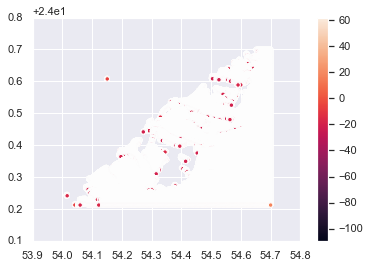

In [49]:
cm = plt.cm.get_cmap('RdYlBu')

x = df_final['Longitude'].values
y = df_final['Latitude'].values
z = df_final['AdjustedElevation_2080'].values
# sc = plt.scatter(x, y, c=z, vmin=min(z), vmax=max(z), cmap=cm)
sc = plt.scatter(x, y, c=z, vmin=min(z), vmax=max(z))
plt.colorbar(sc)
plt.show()

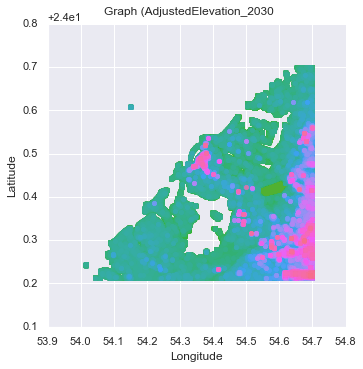

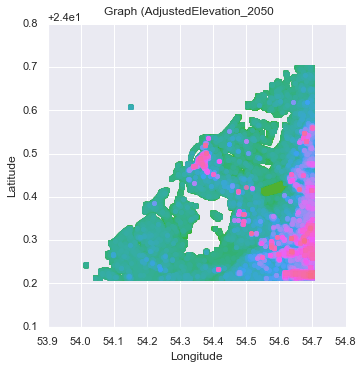

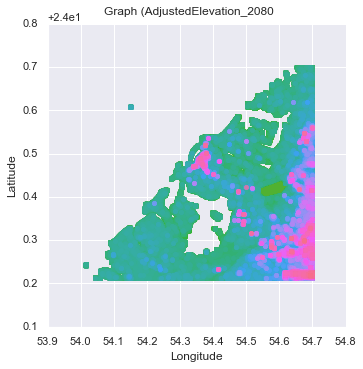

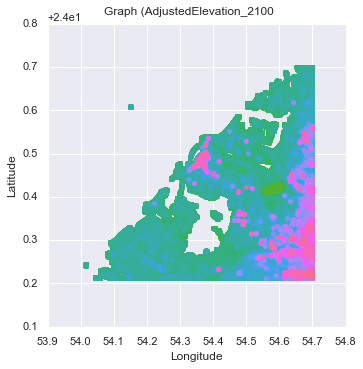

In [47]:
for i in dates:
    sns.lmplot(x='Longitude', y='Latitude', data = df_final, hue='AdjustedElevation_'+str(i),legend =False, fit_reg=False ).fig.suptitle("Graph (AdjustedElevation_"+str(i))